## Autoscout 24 - Projekt


In [121]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


In [122]:
data = pd.read_csv("autoscout24.csv", delimiter= ';')
df = pd.DataFrame(data)

print(df.shape)

(46405, 9)


In [123]:
df.head(10)

,mileage,make,model,fuel,gear,offerType,price,hp,year of sale
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
5,147000,Toyota,Auris,Electric/Gasoline,Automatic,Used,6950,99.0,2011
6,91894,Renault,Scenic,Diesel,Manual,Used,6970,131.0,2011
7,127500,Opel,Zafira,Gasoline,Manual,Used,6972,116.0,2011
8,115000,Mazda,3,Gasoline,Automatic,Used,6980,150.0,2011
9,104,Ford,Transit,Diesel,Manual,Used,6990,86.0,2011


### Vorbereitung

In [124]:
print("Null Werte pro Zeile:\n", df.isnull().sum())
print("\nEinzigartige Typen:\n", df.nunique())

Null Werte pro Zeile:
 mileage           0
make              0
model           143
fuel              0
gear            182
offerType         0
price             0
hp               29
year of sale      0
dtype: int64

Einzigartige Typen:
 mileage         20117
make               77
model             841
fuel               11
gear                3
offerType           5
price            6668
hp                328
year of sale       11
dtype: int64


In [125]:
# Null Werte entfernen
df.dropna(inplace= True)
print("Null Werte pro Zeile:\n", df.isnull().sum())

# Saubere Daten exportieren
df.to_csv("autoscout24_clean.csv", index= False)

Null Werte pro Zeile:
 mileage         0
make            0
model           0
fuel            0
gear            0
offerType       0
price           0
hp              0
year of sale    0
dtype: int64


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 46071 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mileage       46071 non-null  int64  
 1   make          46071 non-null  object 
 2   model         46071 non-null  object 
 3   fuel          46071 non-null  object 
 4   gear          46071 non-null  object 
 5   offerType     46071 non-null  object 
 6   price         46071 non-null  int64  
 7   hp            46071 non-null  float64
 8   year of sale  46071 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.5+ MB


,mileage,price,hp,year of sale
count,4.607100e+04,4.607100e+04,46071.000000,46071.000000
mean,7.123314e+04,1.656312e+04,132.992663,2016.012155
std,6.245413e+04,1.927960e+04,75.074689,3.155555
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,1.990000e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.100000e+04,116.000000,2016.000000
75%,1.050000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


In [7]:
df_num = pd.DataFrame(df[["mileage", "price", "hp", "year of sale"]])
print(df_num,"\n")
print(df_num.corr())

       mileage  price     hp  year of sale
0       235000   6800  116.0          2011
1        92800   6877  122.0          2011
2       149300   6900  160.0          2011
3        96200   6950  110.0          2011
4       156000   6950  156.0          2011
...        ...    ...    ...           ...
46400       99  12990   71.0          2021
46401       99  12990   71.0          2021
46402       99  12990   71.0          2021
46403       99  12990   71.0          2021
46404       99  12990   71.0          2021

[46071 rows x 4 columns] 

               mileage     price        hp  year of sale
mileage       1.000000 -0.303550 -0.014901     -0.678053
price        -0.303550  1.000000  0.746715      0.405698
hp           -0.014901  0.746715  1.000000      0.166900
year of sale -0.678053  0.405698  0.166900      1.000000


### Übersicht & Visualisierungen

In [13]:
import pandas_profiling as pp

# Erstelle einen Profilbericht
profile = pp.ProfileReport(df)

# Zeige den Bericht im Jupyter Notebook an
profile.to_notebook_iframe()

/var/folders/n4/2jsjjy910494c1ljpn5qdgt80000gn/T/ipykernel_74566/2905512391.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

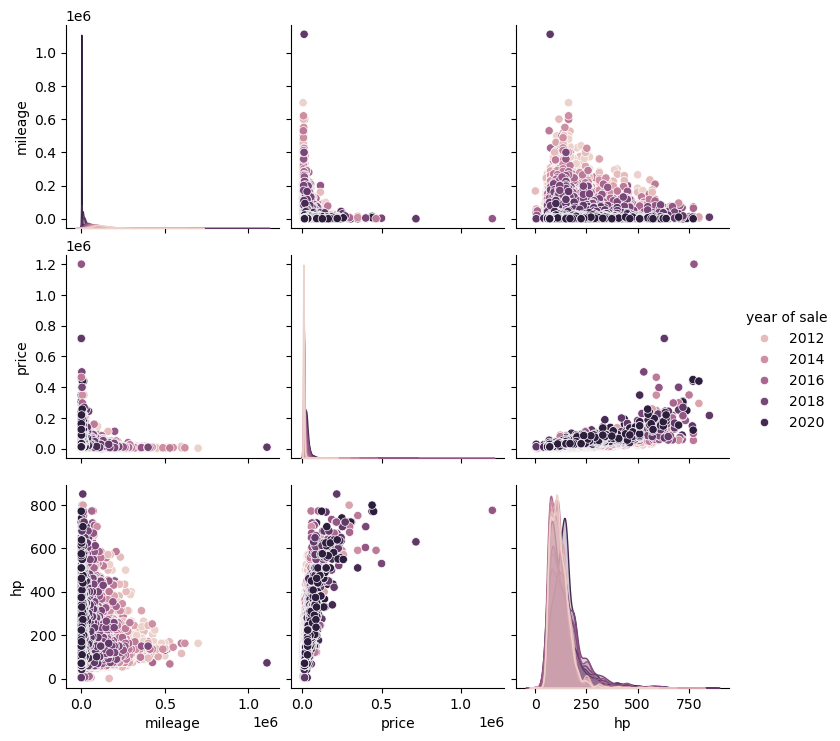

In [9]:
sns.pairplot(df_num, hue= "year of sale")

In [22]:
# Wie viele spalten haben eine 0 in price
print("Anzahl 0 Spalten in price:", df[df["price"] == 0].shape[0])
print("Das teuerste Auto\n", df[df["price"] == df["price"].max()])


Anzahl 0 Spalten in price: 0
Das teuerste Auto
        mileage     make model      fuel       gear offerType    price     hp  \
21675      431  Ferrari   F12  Gasoline  Automatic      Used  1199900  775.0   

       year of sale  
21675          2017  


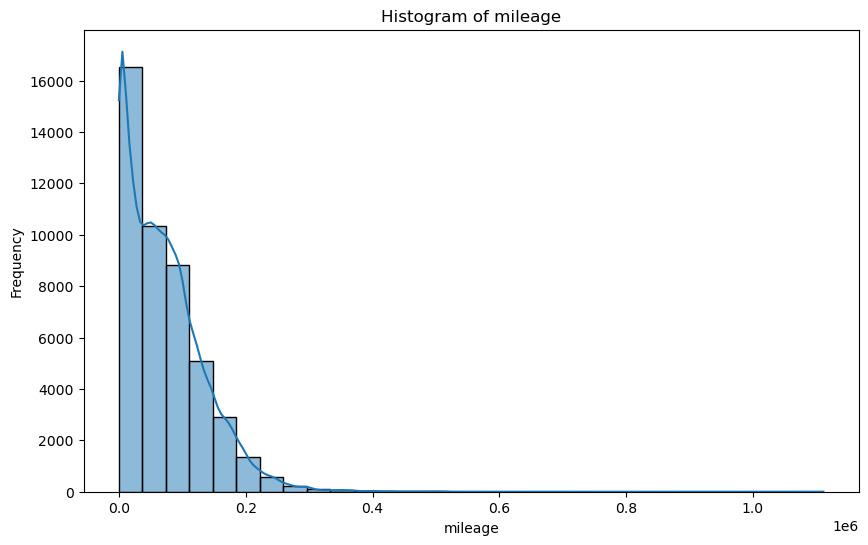

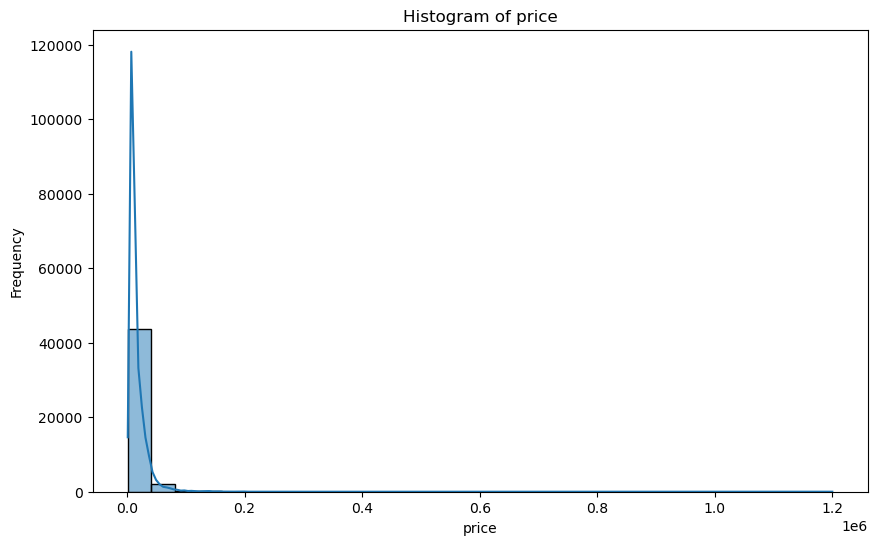

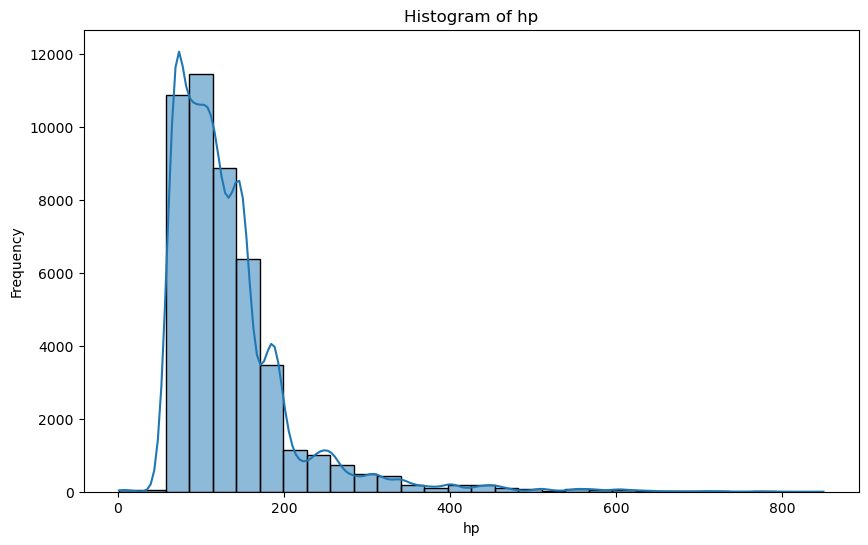

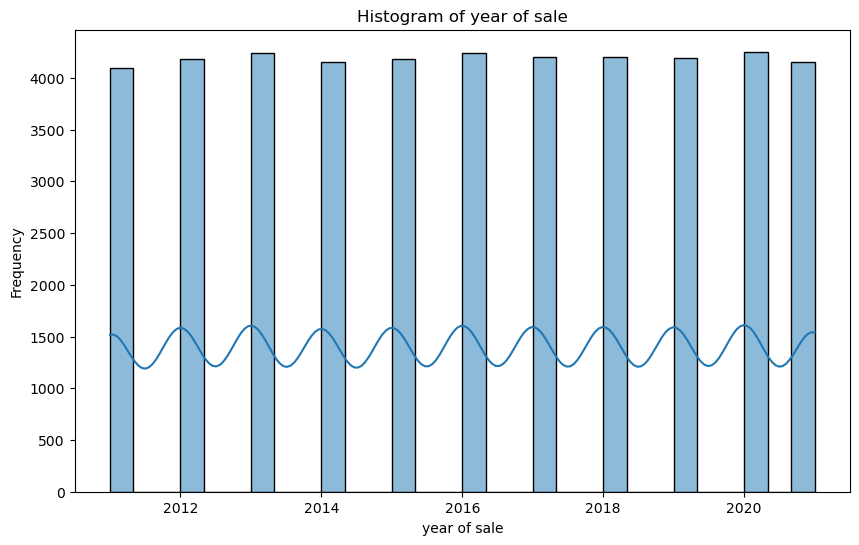

In [14]:

# Für jede Spalte in df_num ein Histogramm erstellen
for column in df_num.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_num[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


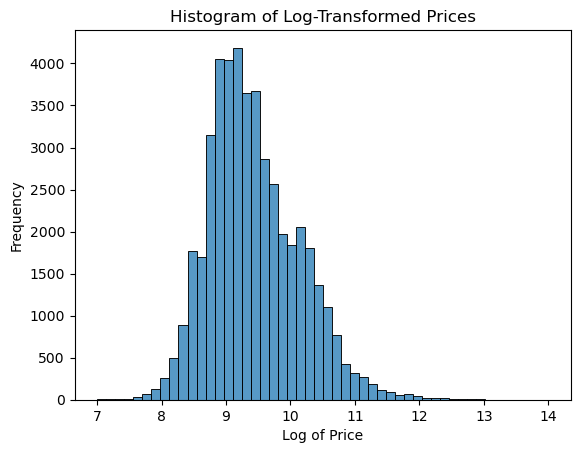

In [23]:
df['price_log'] = np.log1p(df['price'])  # +1 für den Fall, dass der Preis 0 ist
sns.histplot(df['price_log'], bins=50)
plt.xlabel('Log of Price')
plt.ylabel('Frequency')
plt.title('Histogram of Log-Transformed Prices')
plt.show()

## DSI Aufgaben

    Analyse
       Wieviele Autos wurden verkauft? U ̈ber welchen Zeitraum?
     Welche Marken sind erfasst?
     Existieren Korrelationen zwischen den (numerischen) Features? (Scatterplots)
     Gibt es Ver ̈anderungen u ̈ber die Jahre?
     U ̈berlege dir weitere interessante Fragestellungen fu ̈r die gegebenen Daten.
    Machine Learning
        Die Autos welcher 5 Hersteller wurden am ha ̈ufigsten verkauft?
        Betrachte im folgenden nur noch Samples dieser 5 Hersteller.
        Wie teuer war durschnittlich ein Auto von Hersteller X?
        Trainiere ein Modell deiner Wahl (z.b. Lineare Regression) um ausgehend von
        
        Features deiner Wahl, den Verkaufspreis eines Autos vorherzusagen.
        
    - [ ] Welche Kategorie von Machine Learning ist dieses Problem?
    - [ ] Wie wird die Gu ̈te des Modells evaluiert? Was ist die Fehlermetrik?
    - [ ] Probiere noch andere Modelle aus

In [33]:
print("\nEinzigartige Typen:\n", df.nunique())


Einzigartige Typen:
 mileage         20020
make               71
model             835
fuel               11
gear                3
offerType           5
price            6640
hp                319
year of sale       11
price_log        6640
dtype: int64


Format (46071, 10)
Insgesamt Verkauft Autos 46071


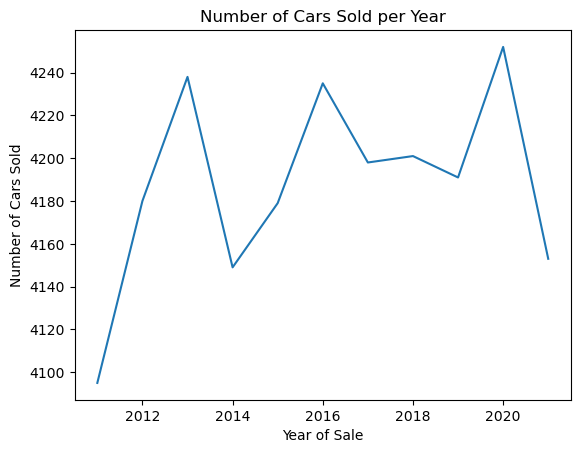

In [46]:
# Verkaufte Autos pro Jahr - Liniendiagram
print("Format", df.shape)
print("Insgesamt Verkauft Autos", df.shape[0])

# Anzahl der verkauften Autos pro Jahr berechnen
sales_per_year = df['year of sale'].value_counts().sort_index()

# DataFrame für das Liniendiagramm erstellen
sales_df = sales_per_year.reset_index()
sales_df.columns = ['year of sale', 'count']

# Liniendiagramm erstellen
sns.lineplot(data=sales_df, x='year of sale', y='count')
plt.xlabel('Year of Sale')
plt.ylabel('Number of Cars Sold')
plt.title('Number of Cars Sold per Year')
plt.show()


In [36]:
# Welche Marken sind erfasst?
# Häufigkeit der einzelnen Marken anzeigen
brand_counts = df["make"].value_counts()
print("Häufigkeit der Marken:\n", brand_counts)


Häufigkeit der Marken:
 make
Volkswagen    6907
Opel          4789
Ford          4410
Skoda         2874
Renault       2792
              ... 
Isuzu            1
Others           1
Zhidou           1
Brilliance       1
Alpine           1
Name: count, Length: 71, dtype: int64


<Axes: >

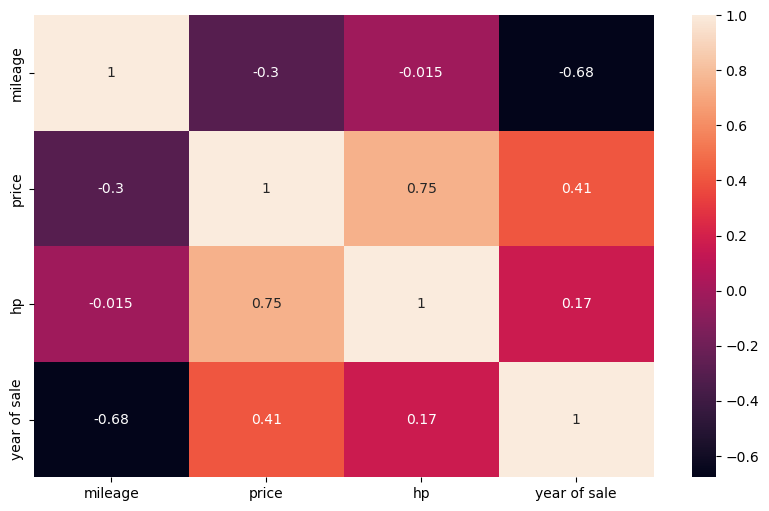

In [66]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_num.corr(), annot= True)

In [50]:
print("Die 5 Häufigst verkauften Autos sind:", brand_counts[:5])

Die 5 Häufigst verkauften Autos sind: make
Volkswagen    6907
Opel          4789
Ford          4410
Skoda         2874
Renault       2792
Name: count, dtype: int64


In [56]:
# Wie teuer war durschnittlich ein Auto von Hersteller X?
top_maker = ["Volkswagen", "Opel", "Ford", "Skoda", "Renault"]
for i in top_maker:
    print(f"Durchschnitte Preis von {i}:", round(df[df["make"] == i]["price"].mean(), 2),"$")


Durchschnitte Preis von Volkswagen: 16067.46 $
Durchschnitte Preis von Opel: 10422.39 $
Durchschnitte Preis von Ford: 13781.13 $
Durchschnitte Preis von Skoda: 13720.22 $
Durchschnitte Preis von Renault: 11335.89 $


In [132]:
# Liste der gewünschten Marken
top_maker = ["Volkswagen", "Opel", "Ford", "Skoda", "Renault"]

# DataFrame filtern nach den Marken in top_maker
df_filtered = df[df['make'].isin(top_maker)]

# Gefilterten DataFrame in eine CSV-Datei exportieren
# df_filtered.to_csv('top5_autos.csv', index=False)

# Optional: Gefilterten DataFrame anzeigen
print(df_filtered)


       mileage        make         model      fuel       gear       offerType  \
1        92800  Volkswagen          Golf  Gasoline     Manual            Used   
3        96200     Renault        Megane  Gasoline     Manual            Used   
6        91894     Renault        Scenic    Diesel     Manual            Used   
7       127500        Opel        Zafira  Gasoline     Manual            Used   
9          104        Ford       Transit    Diesel     Manual            Used   
...        ...         ...           ...       ...        ...             ...   
46376     5000     Renault  Grand Scenic  Gasoline     Manual   Demonstration   
46377      100  Volkswagen          Golf    Diesel  Automatic  Pre-registered   
46379     6000     Renault        Kadjar  Gasoline     Manual   Demonstration   
46381     4800  Volkswagen       T-Cross  Gasoline  Automatic   Demonstration   
46399     1500       Skoda         Fabia  Gasoline     Manual   Demonstration   

       price     hp  year o

ValueError: ('Lengths must match to compare', (46071,), (5,))

## Machine Learning

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df_num.drop("price", axis= 1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25, random_state= 42)

lr = LinearRegression().fit(X_train, y_train)

prediction = lr.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = mean_squared_error(y_test, prediction, squared= False)
r2 = r2_score(y_test, prediction)

results = add_results("Linear Regression", y_test, prediction, results)

print("The model performance test")
print("--------------------------------------")
print("Mean Absolute Error (MSE):", round(mae,3))
print("Mean Squared Error (MSE):", round(mse,3))
print("Root Mean Squared Error (MSE):", round(rmse,3))
print(f"R²-Score: {r2}")
print("\n Ergebnisse interpretieren:\nEin hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.")

<Figure size 1600x800 with 0 Axes>

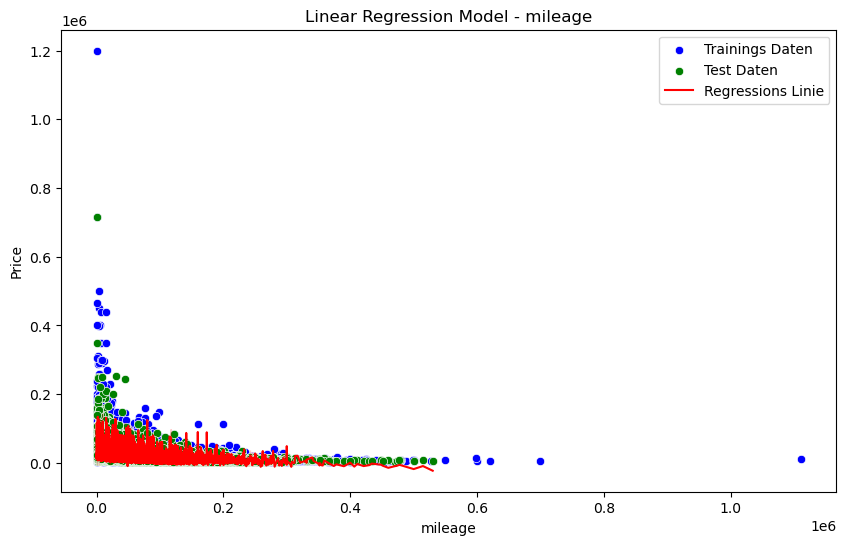

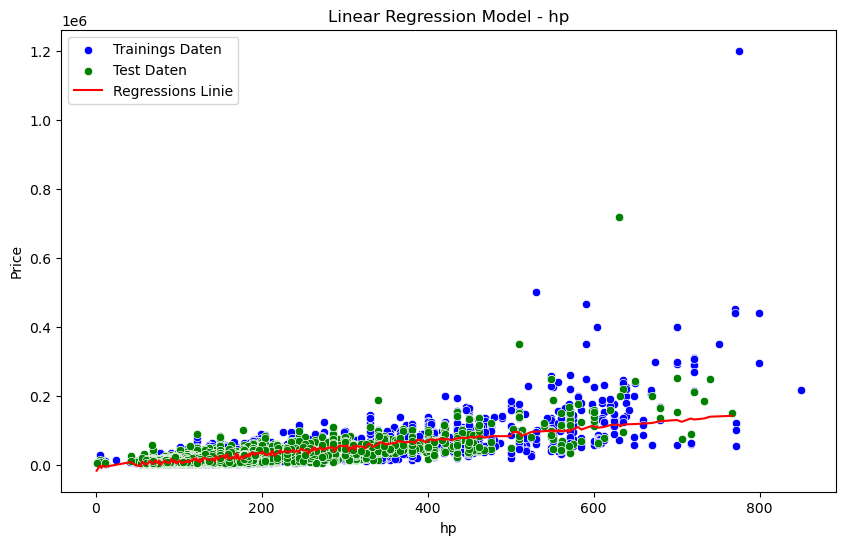

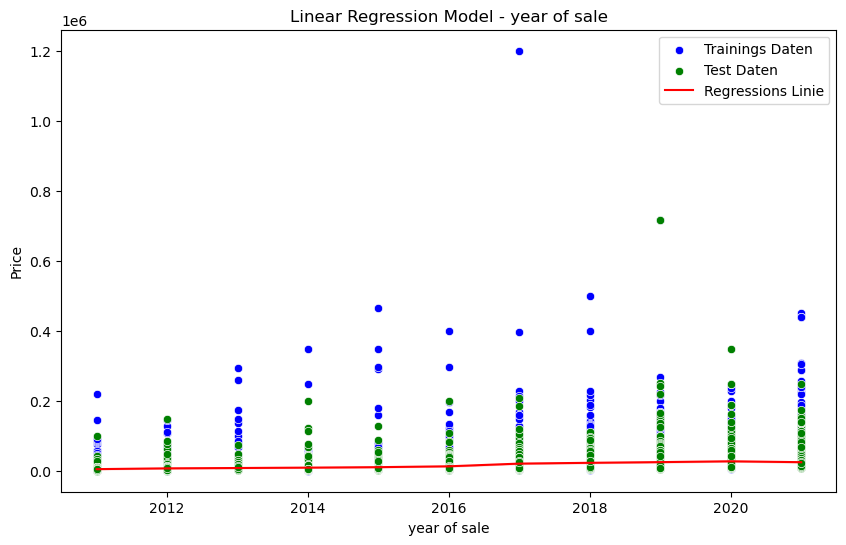

In [69]:
# Erstelle eine Liste der Features, die visualisiert werden sollen
features = ["mileage", "hp", "year of sale"]

plt.figure(figsize=(16, 8))

# Erstelle einen Scatterplot für jedes Feature
for feature in features:
    plt.figure(figsize=(10, 6))

    # Scatterplot für Trainingsdaten
    sns.scatterplot(x=X_train[feature], y=y_train, color="blue", label="Trainings Daten")
    
    # Scatterplot für Testdaten
    sns.scatterplot(x=X_test[feature], y=y_test, color="green", label="Test Daten")
    
    # Regressionslinie
    sns.lineplot(x=X_test[feature], y=prediction, color="red", label="Regressions Linie")

    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(f"Linear Regression Model - {feature}")
    plt.legend()
    plt.show()

In [76]:
df.keys()

Index(['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp',
       'year of sale', 'price_log'],
      dtype='object')

## Preis Vorhersage

In [78]:
# Mehrere neue Autodaten für Vorhersagen
neue_autos = pd.DataFrame({
    'mileage'       : [50000, 120000, 30000],  # Beispielwerte
    'hp'            : [100, 300, 600],
    'year of sale'  : [2018, 2015, 2020]           
})

# Vorhersagen für die Autos
vorhergesagte_preise = lr.predict(neue_autos)

# Ergebnisse anzeigen
for i, preis in enumerate(vorhergesagte_preise):
    print(f"Vorhergesagter Preis für Auto {i+1}: {preis:.2f} €")

Vorhergesagter Preis für Auto 1: 13566.99 €
Vorhergesagter Preis für Auto 2: 44075.75 €
Vorhergesagter Preis für Auto 3: 110258.15 €


## Weitere Modelle

Data Frame zum sammeln der Ergebnisse

In [105]:
# Ergebnisse sammeln, Spaltennamen korrigieren (ohne Dopplung)
results = pd.DataFrame({
    "ML Model Name": [],
    "Mean Absolute Error (MAE)": [],
    "Mean Squared Error (MSE)": [],
    "Root Mean Squared Error (RMSE)": [],
    "R²-Score": []
})

# Funktion zum Hinzufügen von Ergebnissen in den DataFrame
def add_results(model_name, y_true, y_pred, df):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    # Neue Zeile hinzufügen
    new_row = pd.DataFrame({
        "ML Model Name": [model_name],
        "Mean Absolute Error (MAE)": [mae],
        "Mean Squared Error (MSE)": [mse],
        "Root Mean Squared Error (RMSE)": [rmse],
        "R²-Score": [r2]
    })
    
    return pd.concat([df, new_row], ignore_index=True)

# Ergebnisse anzeigen
print(results)


Empty DataFrame
Columns: [ML Model Name, Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R²-Score]
Index: []


In [109]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

prediction = model.predict(X_test)

mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = mean_squared_error(y_test, prediction, squared= False)
r2 = r2_score(y_test, prediction)

results = add_results("DecisionTreeRegressor", y_test, prediction, results)

print("The model performance test: DecisionTreeRegressor")
print("--------------------------------------")
print("Mean Absolute Error (MSE):", round(mae,3))
print("Mean Squared Error (MSE):", round(mse,3))
print("Root Mean Squared Error (MSE):", round(rmse,3))
print(f"R²-Score: {r2}")
print("\n Ergebnisse interpretieren:\nEin hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.")

The model performance test: DecisionTreeRegressor
--------------------------------------
Mean Absolute Error (MSE): 3491.691
Mean Squared Error (MSE): 106453437.113
Root Mean Squared Error (MSE): 10317.627
R²-Score: 0.6598827953679549

 Ergebnisse interpretieren:
Ein hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.


In [110]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

prediction = model.predict(X_test)

mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = mean_squared_error(y_test, prediction, squared= False)
r2 = r2_score(y_test, prediction)

results = add_results("RandomForestRegressor", y_test, prediction, results)

print("The model performance test: RandomForestRegressor")
print("--------------------------------------")
print("Mean Absolute Error (MSE):", round(mae,3))
print("Mean Squared Error (MSE):", round(mse,3))
print("Root Mean Squared Error (MSE):", round(rmse,3))
print(f"R²-Score: {r2}")
print("\n Ergebnisse interpretieren:\nEin hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.")

The model performance test: RandomForestRegressor
--------------------------------------
Mean Absolute Error (MSE): 2946.954
Mean Squared Error (MSE): 55290413.925
Root Mean Squared Error (MSE): 7435.752
R²-Score: 0.8233479205813368

 Ergebnisse interpretieren:
Ein hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.


In [111]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100)
model.fit(X_train, y_train)

prediction = model.predict(X_test)

mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = mean_squared_error(y_test, prediction, squared= False)
r2 = r2_score(y_test, prediction)

results = add_results("GradientBoostingRegressor", y_test, prediction, results)

print("The model performance test")
print("--------------------------------------")
print("Mean Absolute Error (MSE):", round(mae,3))
print("Mean Squared Error (MSE):", round(mse,3))
print("Root Mean Squared Error (MSE):", round(rmse,3))
print(f"R²-Score: {r2}")
print("\n Ergebnisse interpretieren:\nEin hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.")

The model performance test
--------------------------------------
Mean Absolute Error (MSE): 3083.087
Mean Squared Error (MSE): 60705067.587
Root Mean Squared Error (MSE): 7791.346
R²-Score: 0.8060481797988458

 Ergebnisse interpretieren:
Ein hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.


In [112]:
from sklearn.svm import SVR

model = SVR(kernel='rbf')
model.fit(X_train, y_train)

prediction = model.predict(X_test)

mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = mean_squared_error(y_test, prediction, squared= False)
r2 = r2_score(y_test, prediction)

results = add_results("SVR", y_test, prediction, results)

print("The model performance test")
print("--------------------------------------")
print("Mean Absolute Error (MSE):", round(mae,3))
print("Mean Squared Error (MSE):", round(mse,3))
print("Root Mean Squared Error (MSE):", round(rmse,3))
print(f"R²-Score: {r2}")
print("\n Ergebnisse interpretieren:\nEin hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.")

The model performance test
--------------------------------------
Mean Absolute Error (MSE): 8278.829
Mean Squared Error (MSE): 318271399.638
Root Mean Squared Error (MSE): 17840.163
R²-Score: -0.016872556631589486

 Ergebnisse interpretieren:
Ein hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.


In [113]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
model.fit(X_train, y_train)

prediction = model.predict(X_test)

mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = mean_squared_error(y_test, prediction, squared= False)
r2 = r2_score(y_test, prediction)

results = add_results("MLPRegressor", y_test, prediction, results)

print("The model performance test")
print("--------------------------------------")
print("Mean Absolute Error (MSE):", round(mae,3))
print("Mean Squared Error (MSE):", round(mse,3))
print("Root Mean Squared Error (MSE):", round(rmse,3))
print(f"R²-Score: {r2}")
print("\n Ergebnisse interpretieren:\nEin hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.")

The model performance test
--------------------------------------
Mean Absolute Error (MSE): 3682.406
Mean Squared Error (MSE): 76661080.752
Root Mean Squared Error (MSE): 8755.631
R²-Score: 0.755068946606433

 Ergebnisse interpretieren:
Ein hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.


In [114]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100)
model.fit(X_train, y_train)

prediction = model.predict(X_test)

mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = mean_squared_error(y_test, prediction, squared= False)
r2 = r2_score(y_test, prediction)

results = add_results("XGBRegressor", y_test, prediction, results)

print("The model performance test")
print("--------------------------------------")
print("Mean Absolute Error (MSE):", round(mae,3))
print("Mean Squared Error (MSE):", round(mse,3))
print("Root Mean Squared Error (MSE):", round(rmse,3))
print(f"R²-Score: {r2}")
print("\n Ergebnisse interpretieren:\nEin hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.")


The model performance test
--------------------------------------
Mean Absolute Error (MSE): 2933.586
Mean Squared Error (MSE): 81486829.048
Root Mean Squared Error (MSE): 9027.006
R²-Score: 0.739650750021031

 Ergebnisse interpretieren:
Ein hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.


# Ergebnisse im Überblick

In [115]:
results 

,ML Model Name,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R²-Score
0,Linear Regression,4557.929404,9.794842e+07,9896.889271,0.687056
1,DecisionTreeRegressor,3491.690561,1.064534e+08,10317.627494,0.659883
2,RandomForestRegressor,2946.954240,5.529041e+07,7435.752412,0.823348
3,GradientBoostingRegressor,3083.087461,6.070507e+07,7791.345685,0.806048
4,SVR,8278.829475,3.182714e+08,17840.162545,-0.016873
5,MLPRegressor,3682.406150,7.666108e+07,8755.631374,0.755069
6,XGBRegressor,2933.586330,8.148683e+07,9027.005542,0.739651


In [134]:
print("\n Ergebnisse interpretieren:\nEin hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.")
print("\nRandomForestRegressor schneidet ganz gut ab. Man könnte als nächsten Schritt eine Hyperparameter-Optimierung durchführen.")


 Ergebnisse interpretieren:
Ein hoher R²-Score und niedrige MAE/MSE-Werte deuten auf eine gute Modellanpassung hin.

RandomForestRegressor schneidet ganz gut ab. Man könnte als nächsten Schritt eine Hyperparameter-Optimierung durchführen.


### Daten Exportieren

In [ ]:
# DataFrame als CSV-Datei exportieren
df.to_csv('dateiname.csv', index=False)

In [117]:
# DataFrame als CSV-Datei exportieren
results.to_csv('ergebnisse.csv', index=False)

In [127]:
df["hp"].nlargest(20)

43126    850.0
18419    799.0
24389    799.0
21675    775.0
20998    772.0
40404    772.0
45694    771.0
7383     770.0
7384     770.0
43140    767.0
23326    751.0
30672    740.0
14269    733.0
7381     721.0
7382     721.0
18418    721.0
19249    721.0
40770    721.0
40771    721.0
43128    721.0
Name: hp, dtype: float64